In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# Load boston dataset

In [3]:
boston = load_boston()

/Users/jaehwanglee/tensorflow2_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

# Convert a dataset fram

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Create a target column

In [5]:
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# A subplot with 2 rows, 4 columns

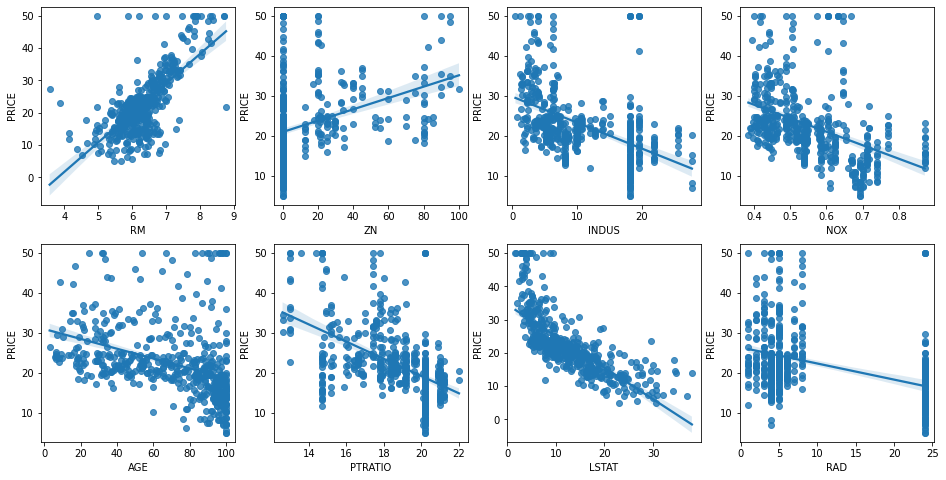

In [7]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row, col = divmod(i, 4)
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

# Linear regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
y_target = boston_df['PRICE']
x_data = boston_df.drop(labels='PRICE', axis=1, inplace=False)

<AxesSubplot:>

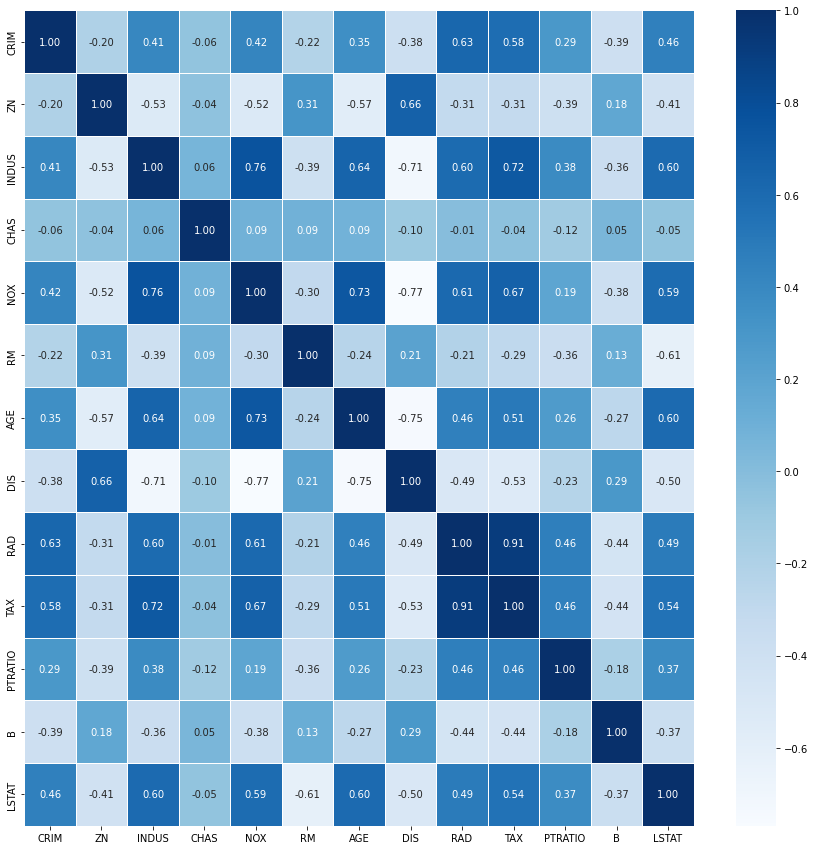

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data=x_data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

# Splite a dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

# Train, Evaluation

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [14]:
"MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse)

'MSE: 17.297, RMSE: 4.159'

In [15]:
"Variance score: {:.3f}".format(r2_score(y_test, y_preds))

'Variance score: 0.757'

# Inspect coeficients and an intercept

In [16]:
print("Coeficients: {}".format(np.round(lr.coef_, 1)))
print("An intercept: {}".format(lr.intercept_))

Coeficients: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
An intercept: 40.995595172164755


In [17]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

# Tune a model using a cross validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
lr = LinearRegression()

In [20]:
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [21]:
print("Negative MSE socres: {}".format(np.round(neg_mse_scores, 2)))
print("RMSE scores: {}".format(np.round(rmse_scores, 2)))
print("An average of RMSE scores: {}".format(np.round(avg_rmse, 2)))

Negative MSE socres: [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE scores: [3.53 5.1  5.75 8.99 5.77]
An average of RMSE scores: 5.83


# Ridge model

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [23]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [27]:
print("Negative MSE socres: {}".format(np.round(neg_mse_scores, 3)))
print("RMSE scores: {}".format(np.round(rmse_scores, 3)))
print("An average of RMSE scores: {:.3f}".format(avg_rmse))

Negative MSE socres: [-11.422 -24.294 -28.144 -74.599 -28.517]
RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
An average of RMSE scores: 5.518


# Tune a hyperparameter 'alpha'

In [28]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("alpha {0}, RMSE: {1:.3f}".format(alpha, avg_rmse))

alpha 0, RMSE: 5.829
alpha 0.1, RMSE: 5.788
alpha 1, RMSE: 5.653
alpha 10, RMSE: 5.518
alpha 100, RMSE: 5.330


# Visualize regression coefficients

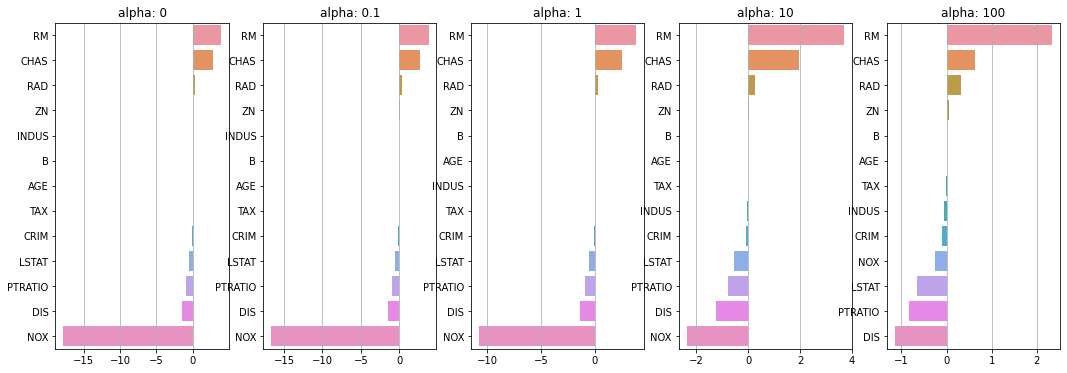

In [47]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for idx, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    col_name = "alpha: {}".format(alpha)
    coeff_df[col_name] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[idx].set_title(col_name)
    axs[idx].grid()
    # axs[idx].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[idx])
plt.show()

In [46]:
coeff_df.sort_values(by='alpha: 0', ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


# Lasso, Elastic Net

In [48]:
from sklearn.linear_model import Lasso, ElasticNet

In [53]:
def get_linear_reg_eval(model_name, params=None, x_data=None, y_target=None, verbose=True, return_coeff=True):
    
    coeff_df = pd.DataFrame()
    
    if verbose:
        print('###### {} ######'.format(model_name))
        
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        else:
            model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print("alpha {0}, RMSE: {1:.3f}".format(param, avg_rmse))
        
        model.fit(x_data, y_target)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=x_data.columns)
            col_name = 'alpha: {}'.format(param)
            coeff_df[col_name] = coeff
    
    return coeff_df

In [54]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data=x_data, y_target=y_target)

###### Lasso ######
alpha 0.07, RMSE: 5.612
alpha 0.1, RMSE: 5.615
alpha 0.5, RMSE: 5.669
alpha 1, RMSE: 5.776
alpha 3, RMSE: 6.189


In [56]:
coeff_lasso_df.sort_values(by='alpha: 0.07', ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [57]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data=x_data, y_target=y_target)

###### ElasticNet ######
alpha 0.07, RMSE: 5.542
alpha 0.1, RMSE: 5.526
alpha 0.5, RMSE: 5.467
alpha 1, RMSE: 5.597
alpha 3, RMSE: 6.068


In [58]:
coeff_elastic_df.sort_values(by='alpha: 0.07', ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
